In [1050]:
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2
%aimport bs_eda
%aimport bs_terminal

In [1044]:
import pandas as pd
import numpy as np
import bs_eda as beda
import bs_terminal as term 
from scipy.stats import f_oneway, chi2_contingency
import pingouin as pg

## Analyse formelle du dataset

In [897]:
df = pd.read_csv('dataset/train_set_preprocessed.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55836 entries, 3053 to 13349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          55836 non-null  object 
 1   year           55836 non-null  int64  
 2   price          55836 non-null  float64
 3   transmission   55836 non-null  object 
 4   mileage        55836 non-null  float64
 5   fuel_type      55836 non-null  object 
 6   tax            55836 non-null  float64
 7   mpg            55836 non-null  float64
 8   engine_size    55836 non-null  float64
 9   brand          55836 non-null  object 
 10  year_category  55836 non-null  object 
 11  fuel_economy   55836 non-null  object 
 12  engine_class   55836 non-null  object 
 13  tax_package    55836 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 6.4+ MB


#### Types

Les variables sont encodées selon 3 types de données:
  * valeur entière
  * valeur décimale
  * valeur discrète

In [898]:
df.dtypes.value_counts()

object     8
float64    5
int64      1
dtype: int64

#### Doublons

In [899]:
print(f'Le dataset comprend {df.duplicated().sum()} doublons')

Le dataset comprend 2 doublons


## Analyse univariée

### Target `price`

#### Statistique `price`

In [900]:
target_var = 'price'

In [901]:
df[target_var].describe()

count    55836.000000
mean     16179.621785
std       7842.495035
min       2395.000000
25%      10200.000000
50%      14450.000000
75%      20149.000000
max      46549.000000
Name: price, dtype: float64

In [902]:
print(f"Le mode de '{target_var}' est {df[target_var].mode()[0]}")

Le mode de 'price' est 9995.0


#### Distribution `price`

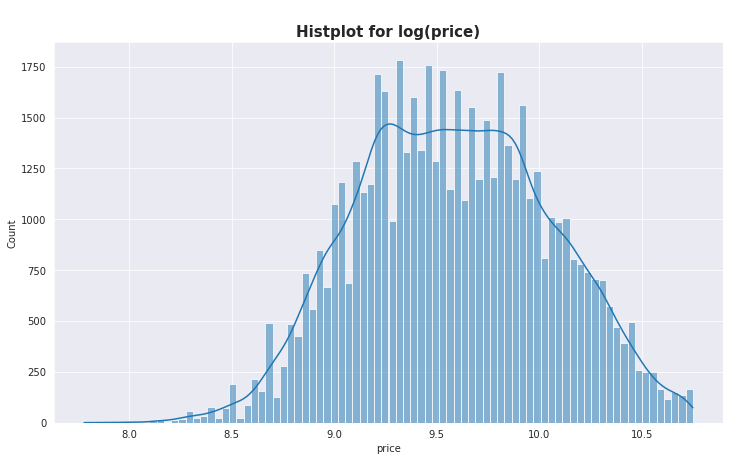

In [903]:
beda.get_histplot(df, target_var, log=True)

À Remarquer: 

* Distribution asymétrique à droite.
* Longue queue sur la droite représentant un certain nombre de voitures très chères.

Dans une distribution *asymétrique à droite*, la plupart des observations sont petites/moyennes, avec quelques observations beaucoup plus grandes que le reste.

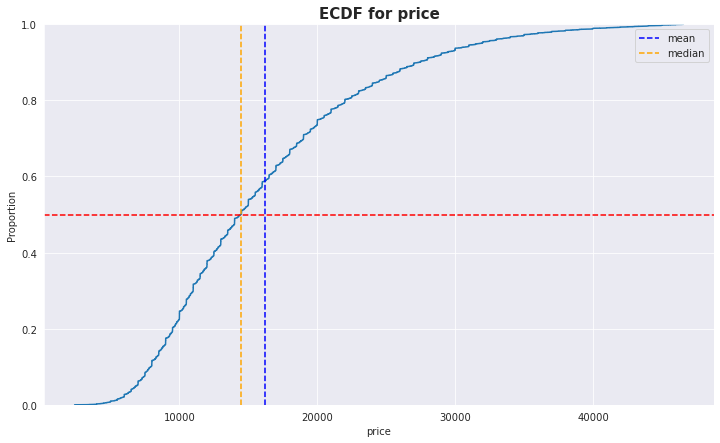

In [904]:
beda.get_ecdf(df, target_var)

À remarquer:
    
La moyenne (plus sensible aux *Outliers*) est supérieur à la médiane. 

Ce qui indique que des valeurs anormales influencent la moyenne.

Lorsque la moyenne diffère de la médiane, la médiane constitue un meilleur indicateur du centre de la distribution.

In [905]:
threshold = 60000
pct_under, pct_over = beda.get_repartition(df, target_var, threshold)
print(f"{pct_under}% des véhicules ont un prix inférieur à {threshold}£")
print(f"{pct_over}% des véhicules ont un prix supérieur à {threshold}£")

100.0% des véhicules ont un prix inférieur à 60000£
0.0% des véhicules ont un prix supérieur à 60000£


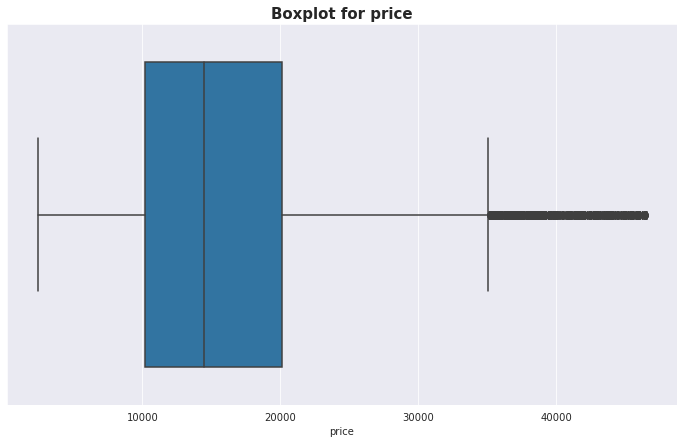

In [906]:
beda.get_boxplot(data=df, x=target_var, orient='h')

### Variables continues 

#### Year
##### Statistique `year`

In [907]:
var = 'year'

In [908]:
df[var].describe()

count    55836.000000
mean      2017.187191
std          1.754859
min       2011.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

In [909]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'year' est 2019


##### Distribution `year`

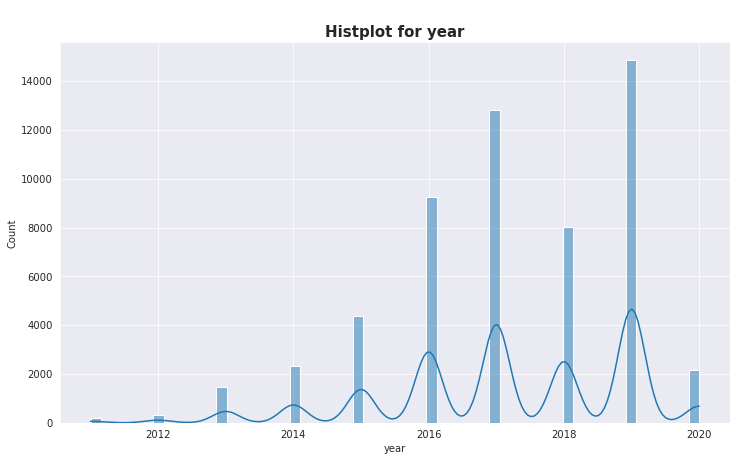

In [910]:
beda.get_histplot(df, var)

À remarquer:

* Valeurs au-delà de la date actuelle
* Le nombre de voiture datant d'avant 2010 devient négligeable 
* Près de 90% des voitures du dataset sont relativement récentes, max 5 ans.

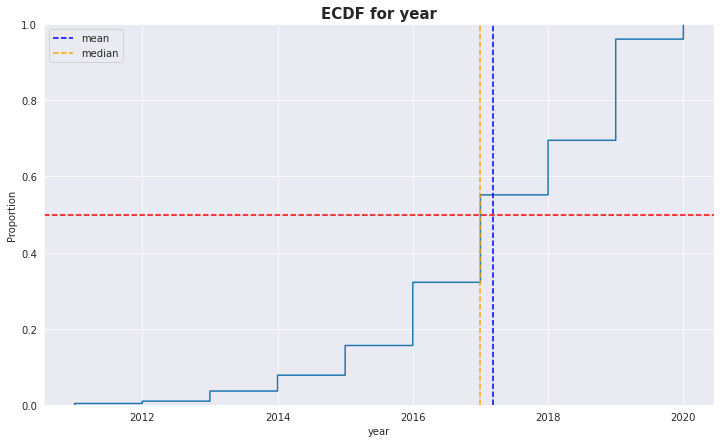

In [911]:
beda.get_ecdf(df, var)

À remarquer:
* Moyenne et médiane correspondent
* $\approx95\%$ des voitures ont une date $>2010$

#### Mileage

##### Statistique `mileage`

In [912]:
var = 'mileage'

In [913]:
df[var].describe()

count    55836.000000
mean     21898.817967
std      17827.555381
min          1.000000
25%       7885.000000
50%      17550.500000
75%      31656.250000
max      86735.000000
Name: mileage, dtype: float64

In [914]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'mileage' est 10.0


##### Distribution `mileage`

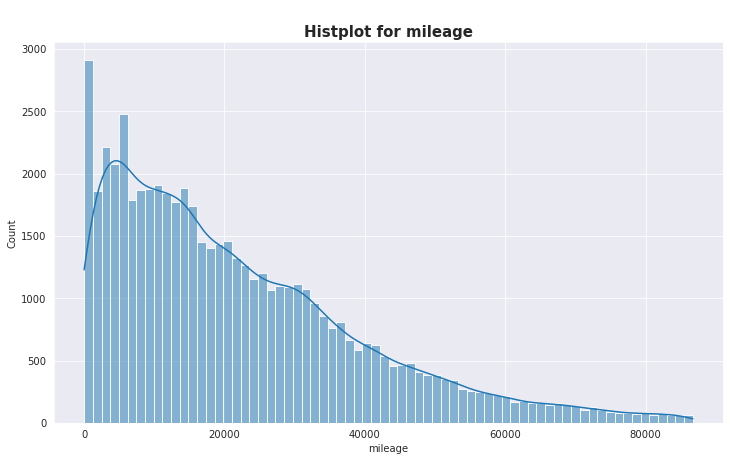

In [915]:
beda.get_histplot(df, var)

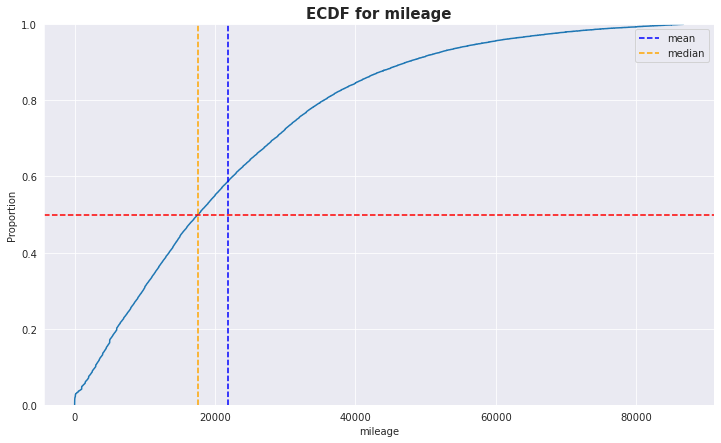

In [916]:
beda.get_ecdf(df, var)

À remarquer:
* Distribution asymétrique à droite.
* un pic suspect dans les valeurs basses.
* Les distances de la majorité des voitures du dataset sont plutôt faibles, $> 80\%$ ont moins de $50000$ miles (environ 80000 km).
* La moyenne est supérieur à la médiane. Quelques valeurs hautes influencent la distribution.

##### Anomalie `mileage`

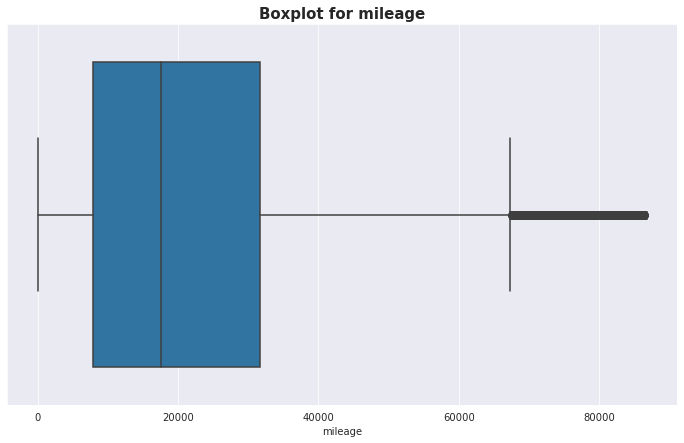

In [917]:
beda.get_boxplot(data=df, x=var, orient='h')

In [918]:
beda.get_occurence(data=df, feature=var, value=1, operator='=', show=True)
beda.get_occurence(data=df, feature=var, value=200000, operator='>', show=True)

Il y a 19 entrées ayant une valeur = à 1 pour la variable 'mileage'
Il y a 0 entrée ayant une valeur > à 200000 pour la variable 'mileage'


À remarquer:

* La distribution est désaxée.
* Une grande disparité des valeurs.
* Quelques véhicules ont parcouru des distances trop basses pour être réalistes.
* Quelques valeurs extrêmes au-delà de $200000$

#### Miles Per Galon
##### Statistique `mpg`

In [919]:
var = 'mpg'

In [920]:
df[var].describe()

count    55836.000000
mean        55.011931
std         10.861358
min          8.800000
25%         47.100000
50%         55.400000
75%         62.800000
max         94.100000
Name: mpg, dtype: float64

In [921]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'mpg' est 60.1


##### Distribution `mpg`

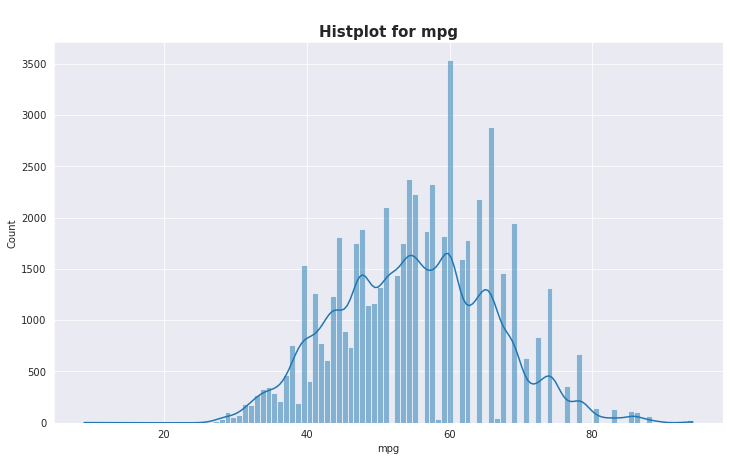

In [922]:
beda.get_histplot(df, var)

In [923]:
beda.get_occurence(data=df, feature=var, value=10, operator='<=', show=True)
beda.get_occurence(data=df, feature=var, value=140, operator='>=', show=True)

Il y a 7 entrées ayant une valeur <= à 10 pour la variable 'mpg'
Il y a 0 entrée ayant une valeur >= à 140 pour la variable 'mpg'


À remarquer:

* Distribution asymétrique à droite.
* Des valeurs suspectes sur le rendement `mpg`. 

   
  Plus la valeur de `mpg` est élevée, plus le véhicule est économique c'est-à-dire plus il peut parcourir de distance avec un certain volume de carburant.
  
  Les pires et meilleurs rendements pour 2021 sont respectivement de $10$ pour Bugatti/Lamborghini et $142$ pour Tesla selon le site [fueleconomy.gov](https://www.fueleconomy.gov/feg/best/bestworstnf.shtml)

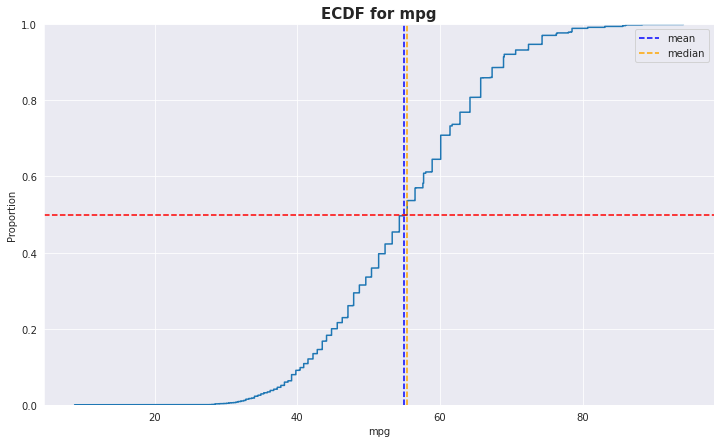

In [924]:
beda.get_ecdf(df, var)

À remarquer:
* Médiane et moyenne correspondent.
* La majorité des valeurs du `mpg` se situe entre $\approx25$ et $\approx80$

#### Engine Size
##### Statistique `engine_size`

In [925]:
var = 'engine_size'

In [926]:
df[var].describe()

count    55836.000000
mean         1.632676
std          0.487692
min          1.000000
25%          1.200000
50%          1.500000
75%          2.000000
max          3.000000
Name: engine_size, dtype: float64

In [927]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'engine_size' est 2.0


##### Distribution `engine_size`

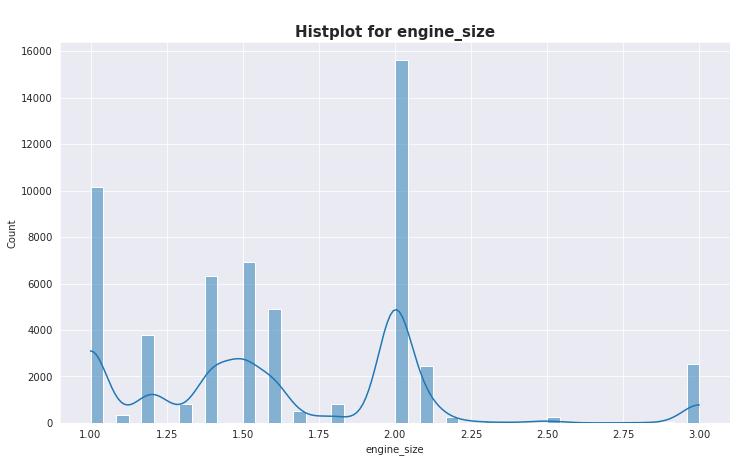

In [928]:
beda.get_histplot(df, var)

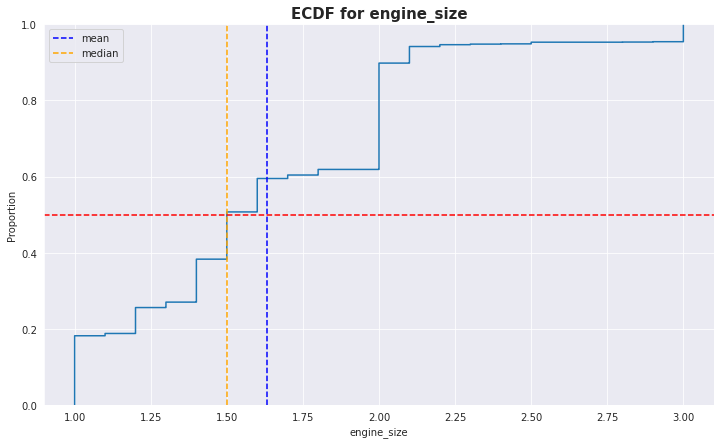

In [929]:
beda.get_ecdf(df, var)

In [930]:
beda.get_occurence(data=df, feature=var, value=0, operator='=', show=True)
beda.get_occurence(data=df, feature=var, value=6, operator='>', show=True)

Il y a 0 entrée ayant une valeur = à 0 pour la variable 'engine_size'
Il y a 0 entrée ayant une valeur > à 6 pour la variable 'engine_size'


À remarquer

* Distribution asymétrique à droite.
* Quelques valeurs hautes influencent la distribution
* La plus grande part 90% des voitures ont un `engine size` de 2 ou moins.
* Un nombre de voiture ont un moteur de taille 0

##### Notes sur Engine Size

* *Small Engine Size*: 
  * de 1 litre à 1,9 litre 
  * Ils sont généralement les plus économiques car ils consomment moins de carburant. 
  * Cela se traduit souvent par une puissance moindre par rapport à un moteur plus gros. 
* *Large Engine Size*:
  * 2,0 litres et plus
  * Plus puissants, mais consomment plus de carburant.

#### Tax
##### Statistique `tax`

In [931]:
var = 'tax'

In [932]:
df[var].describe()

count    55836.000000
mean       127.396572
std         50.728203
min         10.000000
25%        135.000000
50%        145.000000
75%        145.000000
max        305.000000
Name: tax, dtype: float64

In [933]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'tax' est 145.0


##### Distribution `tax`

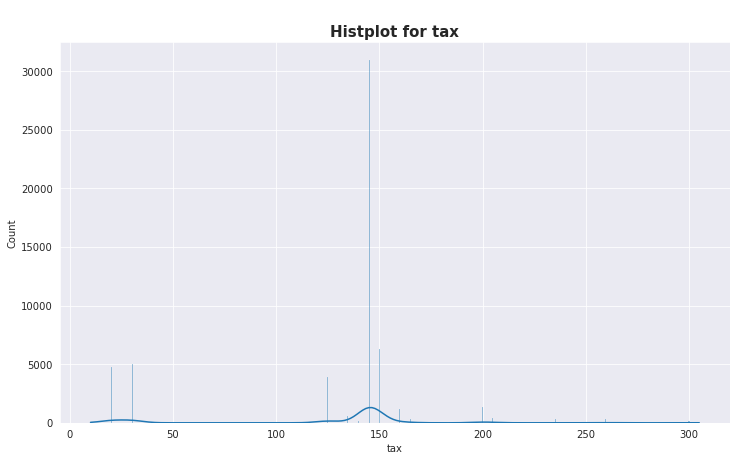

In [934]:
beda.get_histplot(df, var)

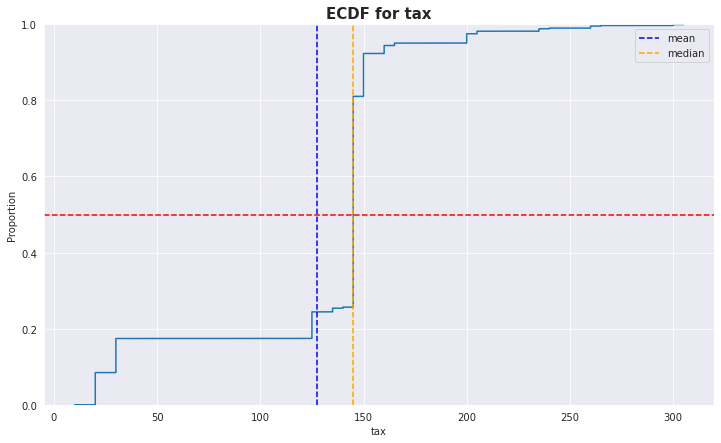

In [935]:
beda.get_ecdf(df, var)

In [936]:
beda.get_occurence(data=df, feature=var, value=0, operator='=', show=True)
beda.get_occurence(data=df, feature=var, value=300, operator='>', show=True)

Il y a 0 entrée ayant une valeur = à 0 pour la variable 'tax'
Il y a 39 entrées ayant une valeur > à 300 pour la variable 'tax'


À remarquer

* Distribution asymétrique à droite.
* 2 pics, l'un autour des 25-30, l'autre près des 150.
* Quelques valeurs hautes et un très grand nombre de voitures pour lesquelles la tax vaut 0.

### Variables Discrètes

In [937]:
df.describe(include='object')

model transmission fuel_type  brand year_category fuel_economy  \
count    55836        55836     55836  55836         55836        55836   
unique     162            3         3      9            10            3   
top     Fiesta       Manual    Petrol   ford  (2018, 2019]         High   
freq      3958        32527     31282  10698         14848        43045   

       engine_class tax_package  
count         55836       55836  
unique            2           7  
top           small   ]125,175]  
freq          34551       39436

##### Suggestion variables discrètes

Encoder les features. LabelEncoder et/ou OneHotEncoder?

#### Model

##### Statistique `model`

In [938]:
var = 'model'

In [939]:
df[var].describe()

count      55836
unique       162
top       Fiesta
freq        3958
Name: model, dtype: object

In [940]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'model' est Fiesta


In [941]:
print(f"{df[var].nunique()} {var}(s) uniques encodés")

162 model(s) uniques encodés


In [942]:
df_brand_model = df.value_counts(
    subset=['brand', 'model'], ascending=False, normalize=True)
df_brand_model = df_brand_model.reset_index()
df_brand_model.columns = ['brand', 'model', 'model count']

n = 10
print(f'les {n} models les plus présents:')
df_brand_model.head(n)

les 10 models les plus présents:


brand    model  model count
0      ford   Fiesta     0.070886
1        vw     Golf     0.048822
2      ford    Focus     0.048499
3  mercedes  C Class     0.036733
4      opel    Corsa     0.034942
5        vw     Polo     0.031790
6  mercedes  A Class     0.027527
7      opel    Astra     0.024662
8      ford     Kuga     0.024482
9    toyota    Yaris     0.024124

In [943]:
limit = 0.0001
beda.get_occurence(data=df_brand_model, feature='model count',
                   value=limit, operator='<', show=True)
#print(f'\nLes {n} models les moins représentés:')
#df_brand_model[df_brand_model['model count']<limit]

Il y a 17 entrées ayant une valeur < à 0.0001 pour la variable 'model count'


##### Distribution de ` model` par marque

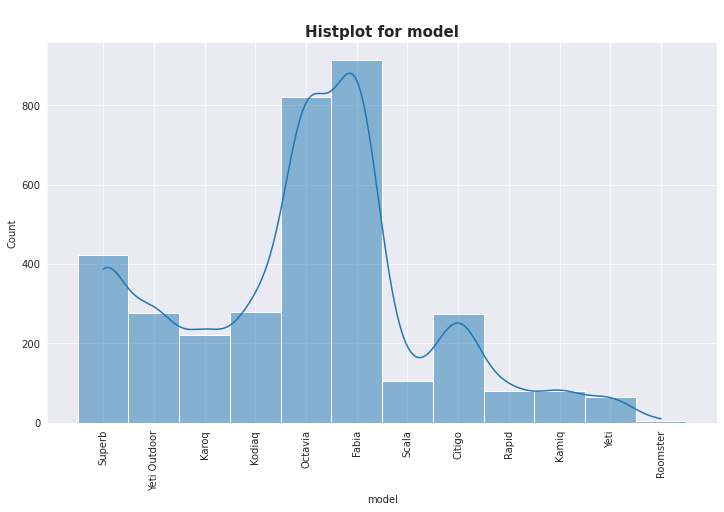

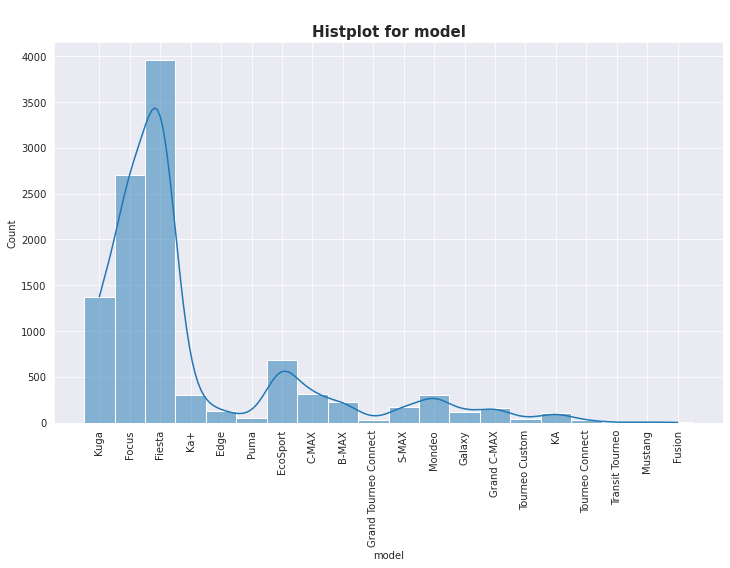

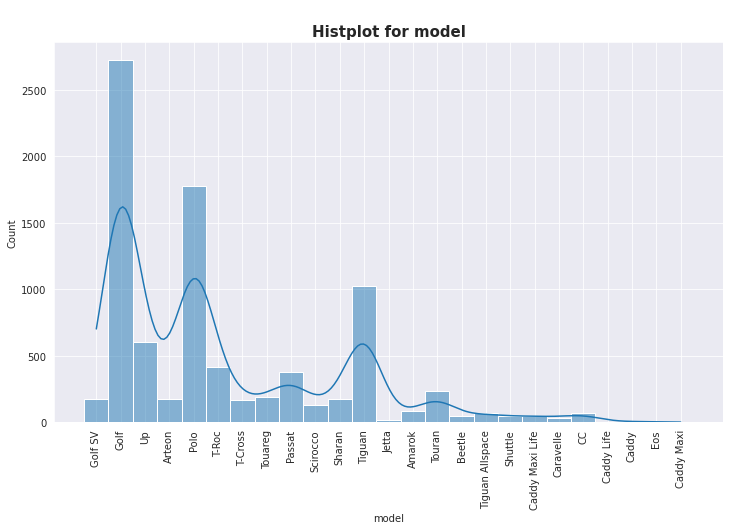

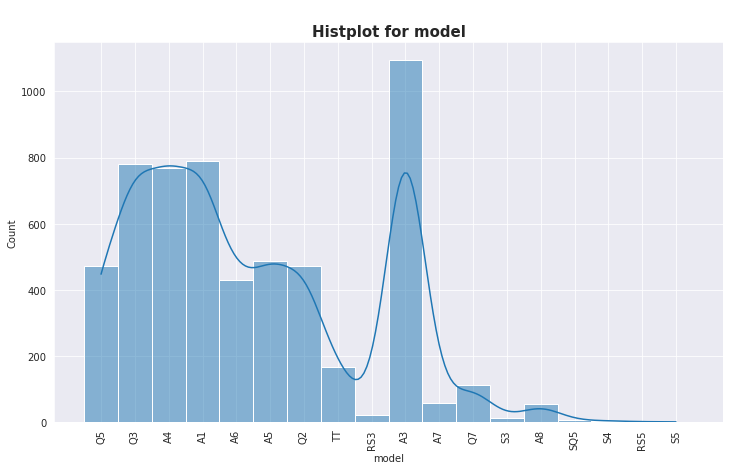

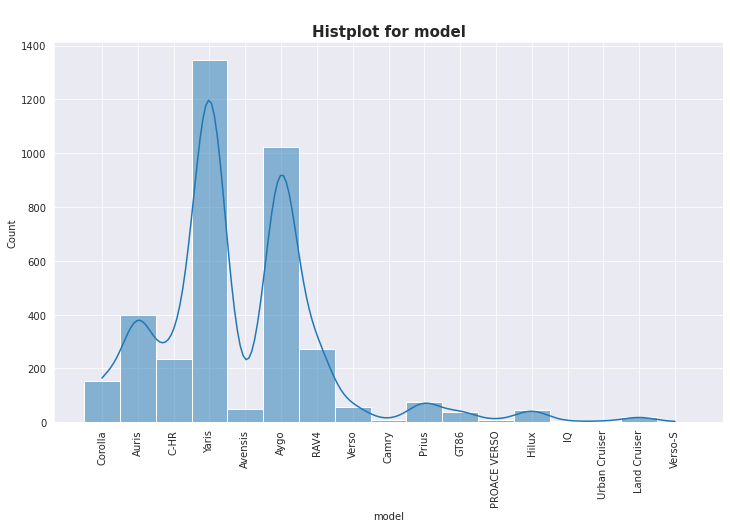

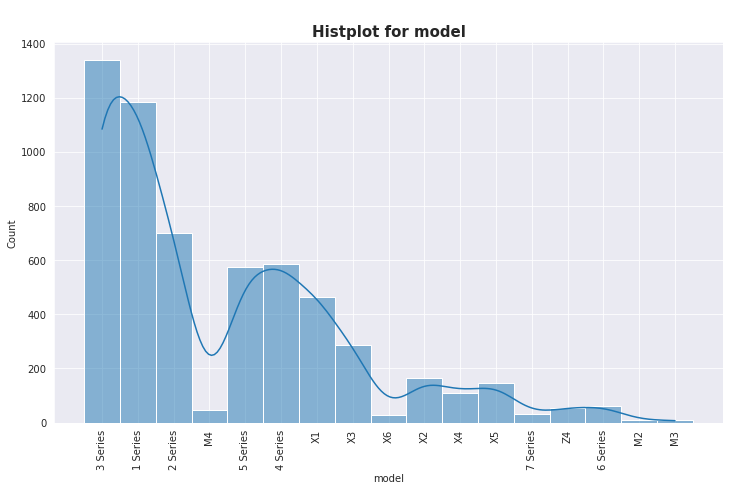

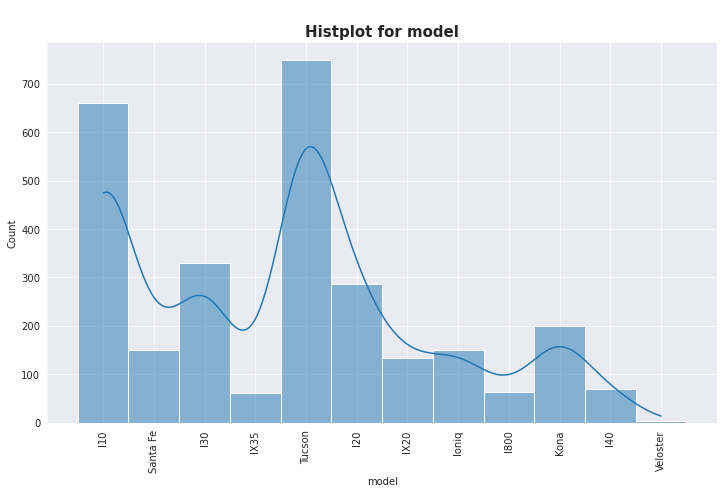

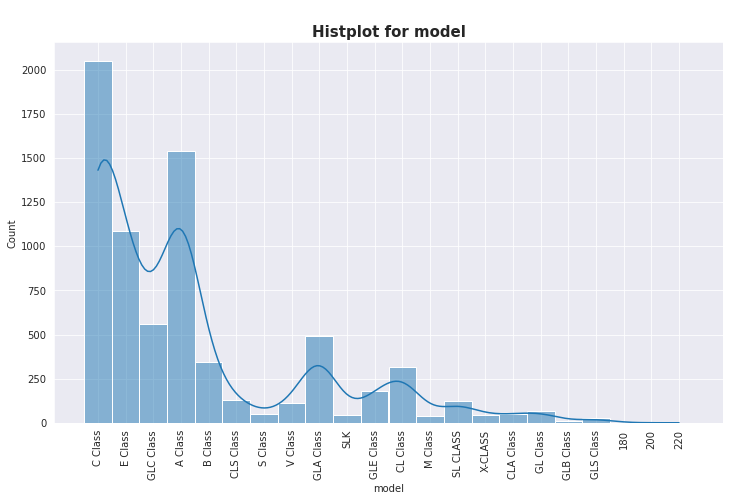

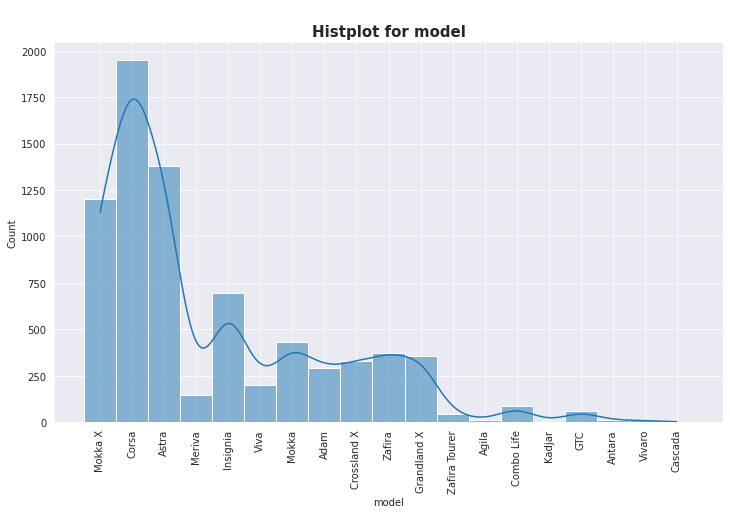

In [944]:
for brand in df['brand'].unique():
    beda.get_histplot(data=df[df['brand'] == brand],
                      column="model", rotation=90)

#### Transmission
##### Statistique `transmission`

In [945]:
var = 'transmission'

In [946]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

3 transmission uniques encodés:
['Semi-Auto' 'Automatic' 'Manual']


In [947]:
df[var].describe()

count      55836
unique         3
top       Manual
freq       32527
Name: transmission, dtype: object

In [948]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'transmission' est Manual


##### Distribution `transmission`

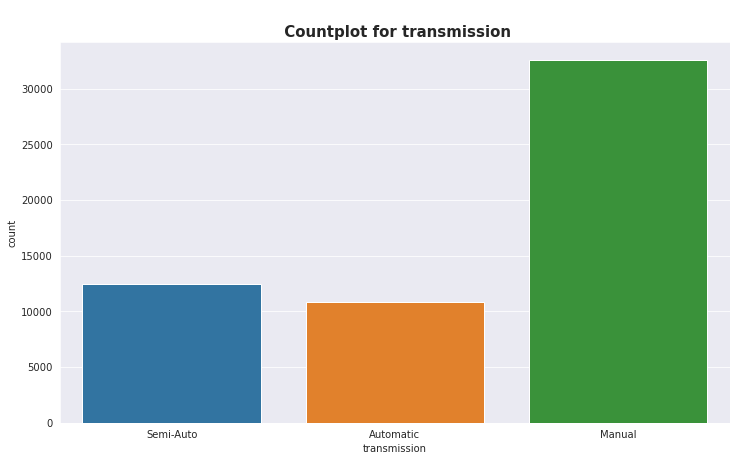

Manual       0.582545
Semi-Auto    0.222885
Automatic    0.194570
Name: transmission, dtype: float64


In [949]:
beda.get_countplot(df, var)

#### Fuel Type

In [950]:
var = 'fuel_type'

In [951]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

3 fuel_type uniques encodés:
['Petrol' 'Diesel' 'Hybrid']


##### Statistique `fuel_type`

In [952]:
df[var].describe()

count      55836
unique         3
top       Petrol
freq       31282
Name: fuel_type, dtype: object

In [953]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'fuel_type' est Petrol


##### Distribution `fuel_type`

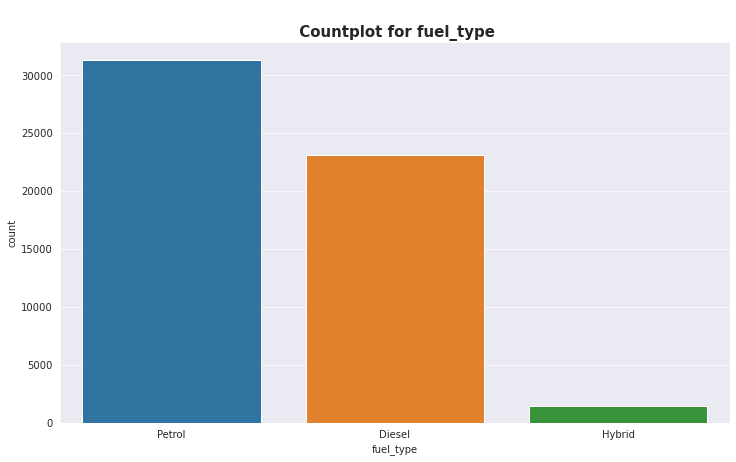

Petrol    0.560248
Diesel    0.413658
Hybrid    0.026094
Name: fuel_type, dtype: float64


In [954]:
beda.get_countplot(df, var)

À remarquer:

* Nombre de type `other`et `electric` est négligeable.

#### Fuel Economy

In [955]:
var = 'fuel_economy'

In [956]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

3 fuel_economy uniques encodés:
['Medium' 'High' 'Low']


##### Statistique `fuel_economy`

In [957]:
df[var].describe()

count     55836
unique        3
top        High
freq      43045
Name: fuel_economy, dtype: object

In [958]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'fuel_economy' est High


##### Distribution `fuel_economy`

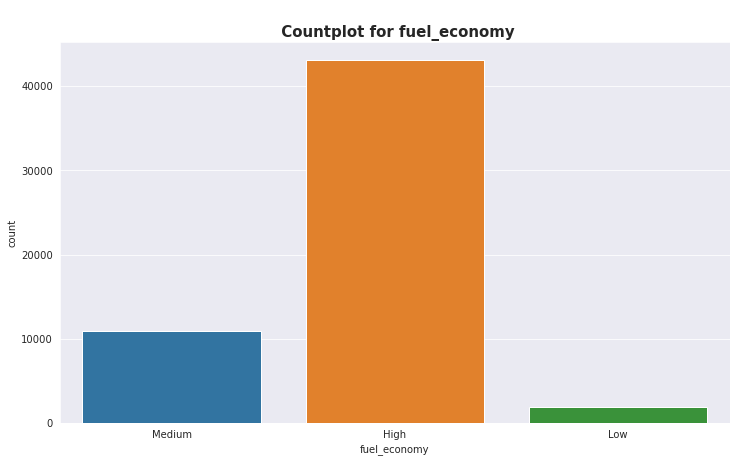

High      0.770918
Medium    0.195197
Low       0.033885
Name: fuel_economy, dtype: float64


In [959]:
beda.get_countplot(df, var)

À remarquer:

* Nombre de type `other`et `electric` est négligeable.

#### Engine Class

In [960]:
var = 'engine_class'

In [961]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

2 engine_class uniques encodés:
['large' 'small']


##### Statistique `engine_class`

In [962]:
df[var].describe()

count     55836
unique        2
top       small
freq      34551
Name: engine_class, dtype: object

In [963]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'engine_class' est small


##### Distribution `engine_class`

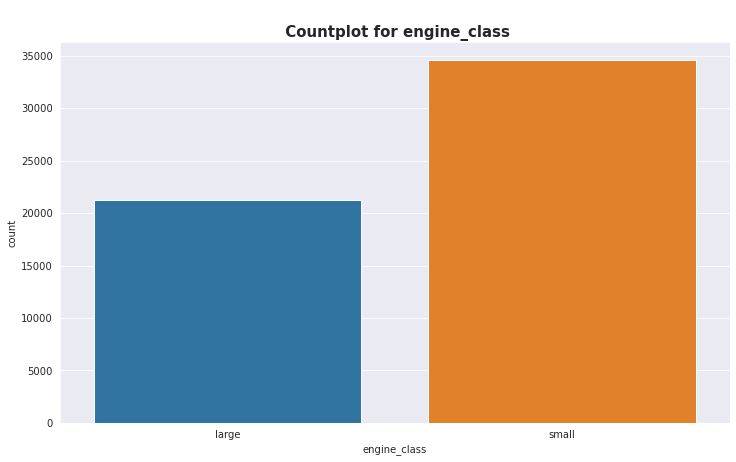

small    0.618794
large    0.381206
Name: engine_class, dtype: float64


In [964]:
beda.get_countplot(df, var)

À remarquer:

* Nombre de type `other`et `electric` est négligeable.

#### Year Category

In [965]:
var = 'year_category'

In [966]:
print(f"{df[var].nunique()} {var} uniques encodés:\n{df[var].unique()}")

10 year_category uniques encodés:
['(2018, 2019]' '(2016, 2017]' '(2017, 2018]' '(2014, 2015]'
 '(2015, 2016]' '(2013, 2014]' '(2019, 2020]' '(2012, 2013]'
 '(2010, 2011]' '(2011, 2012]']


##### Statistique `year_category`

In [967]:
df[var].describe()

count            55836
unique              10
top       (2018, 2019]
freq             14848
Name: year_category, dtype: object

In [968]:
print(f"Le mode de '{var}' est {df[var].mode()[0]}")

Le mode de 'year_category' est (2018, 2019]


##### Distribution `engine_class`

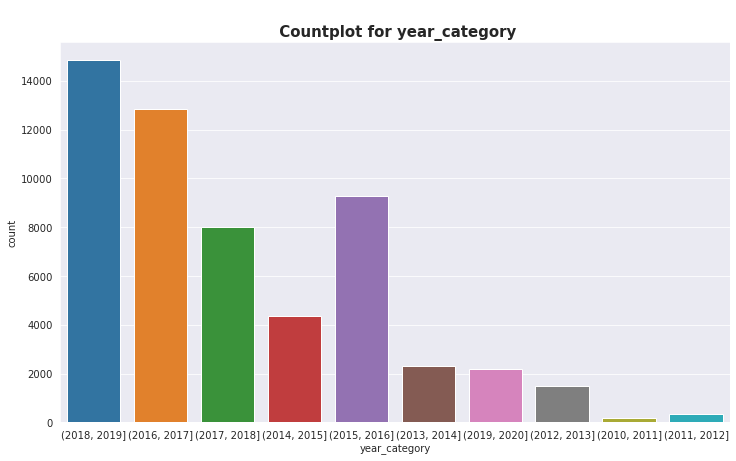

(2018, 2019]    0.265922
(2016, 2017]    0.229816
(2015, 2016]    0.166004
(2017, 2018]    0.143366
(2014, 2015]    0.078068
(2013, 2014]    0.041694
(2019, 2020]    0.038971
(2012, 2013]    0.026578
(2011, 2012]    0.006089
(2010, 2011]    0.003492
Name: year_category, dtype: float64


In [969]:
beda.get_countplot(df, var)

À remarquer:

* Nombre de type `other`et `electric` est négligeable.

## Analyse Multivariée

### Variables Continues vs Target

#### Year vs Price

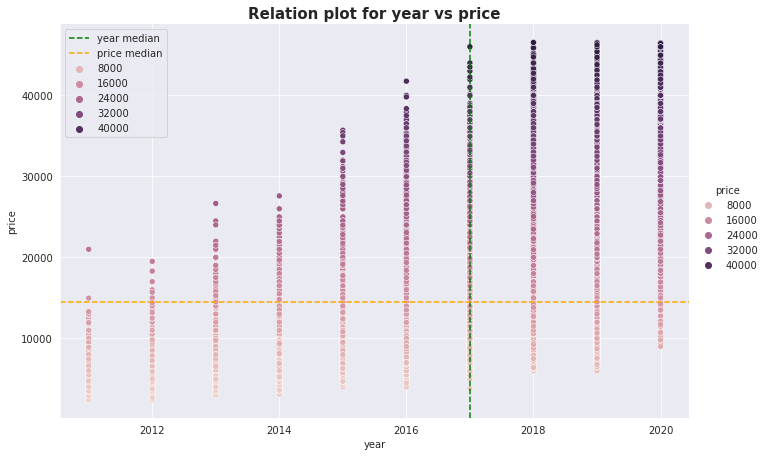

Avg year: 2017.1871910595314
Avg price: 16179.621785228168


In [970]:
var = 'year'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:

* Plus la date est récente (grande) plus le prix augmente
* Quelques voitures surévaluées par rapport à leur date, peut-être dû à d'autres caractéristiques du véhicule.


#### Mileage vs Price

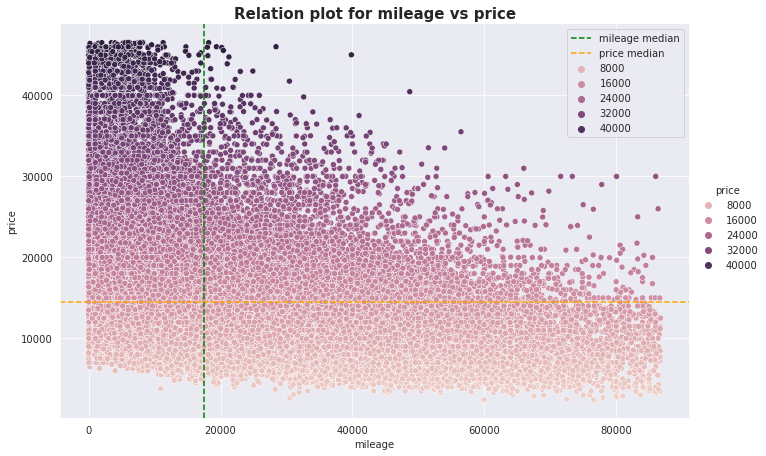

Avg mileage: 21898.817966903072
Avg price: 16179.621785228168


In [971]:
var = 'mileage'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Plus le `mileage` augmente plus le prix baisse
* Une valeur extrème de `mileage` à $>300000$

#### Tax vs Price

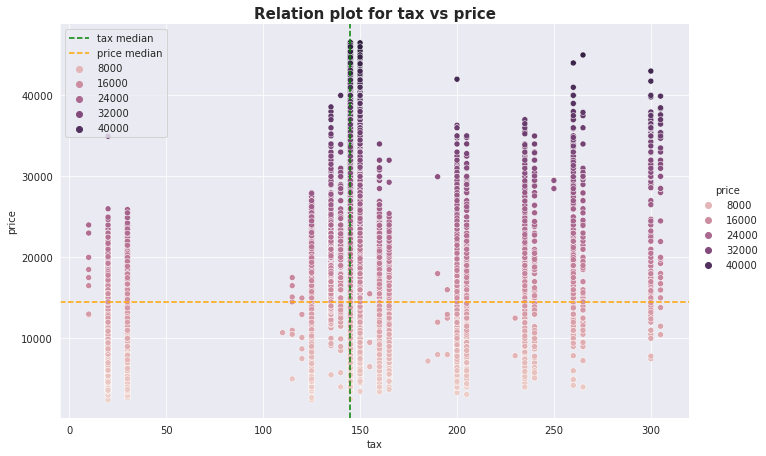

Avg tax: 127.39657210401892
Avg price: 16179.621785228168


In [972]:
var = 'tax'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Pas de corrélations visuellement flagrandes
* 3 bandes, approximativement:
  1. $0<n<50$
  1. $100<n<350$
  1. $500<n<600$
* On retrouve tous les prix des véhicules pour des taxes entre $100<n<350$£ 
* En comparaison, on remarque une plus grande disparité de prix de véhicules dans $500<n<600$£

Suggestions:
* Créer des bandes pour réduire le bruit

#### Miles Per Galon vs Price

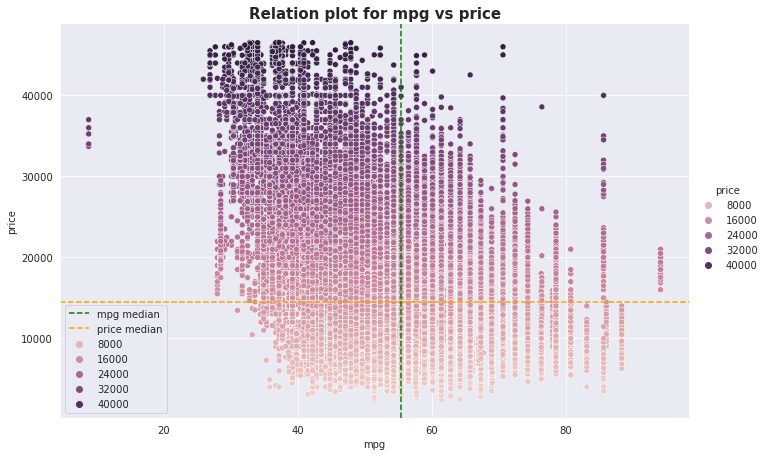

Avg mpg: 55.0119306540517
Avg price: 16179.621785228168


In [973]:
var = 'mpg'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Quelques valeurs pour `mpg`$>100$ avec des prix sans tendance marquée
* En faisant abstraction des valeurs extrêmes, on aperçoit une corrélation négative

Suggestions:
* Investiguer sur la fiabilité des valeurs extrèmes de `mpg`

#### Engine Size vs Price

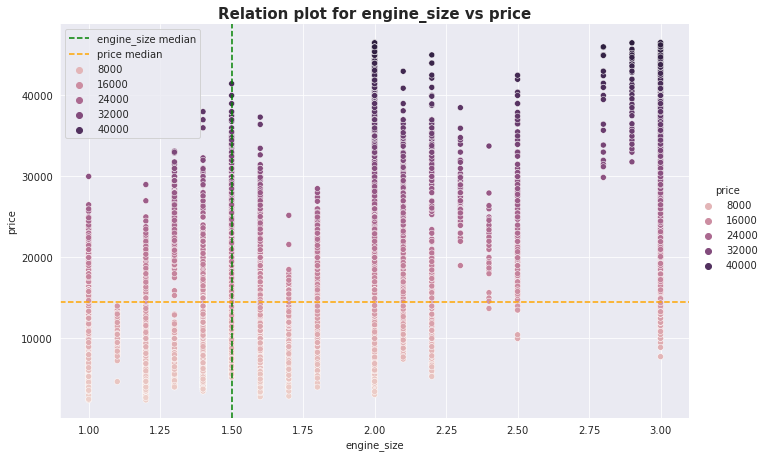

Avg engine_size: 1.6326760512930576
Avg price: 16179.621785228168


In [974]:
var = 'engine_size'
trace = ['median']
beda.get_relplot(data=df, x=var, y=target_var, x_trace=trace, y_trace=trace)

À remarquer:
* Les moteurs plus gros montent plus haut dans les prix
* Quelques valeurs de prix isolées
* Taille de moteur à zéro?

Suggestions:
* Vérifier la pertinence des valeurs isolées

### Variables Discrètes vs Target

#### Model vs Price

In [975]:
var = 'model'

In [976]:
def outliers_count_by_model(data):
    all_suspect_count = 0
    print("Nombre de valeurs suspectes par modèle:")
    for m in brand_data['model'].unique():
        low_outlier, high_outlier = beda.get_suspected_outliers(
            data=brand_data[brand_data['model'] == m], feature=target_var)
        model_suspect_count = low_outlier.count() + high_outlier.count()
        if(model_suspect_count > 0):
            print(f"{m}: {model_suspect_count}")
        all_suspect_count += model_suspect_count
    print(f"total: {all_suspect_count}")

##### Skoda

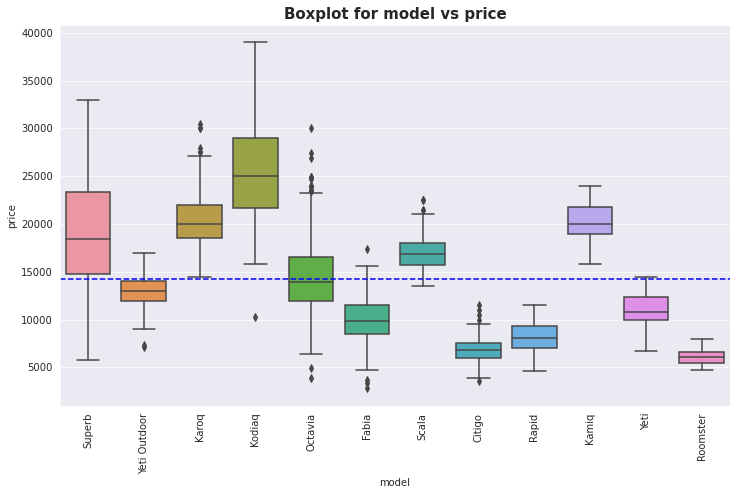

Avg price: 14278.935966149505


In [977]:
brand = 'skoda'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [978]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Yeti Outdoor: 2
Karoq: 6
Kodiaq: 1
Octavia: 15
Fabia: 4
Scala: 4
Citigo: 5
total: 37


À remarquer:

Suggestions:

##### Ford

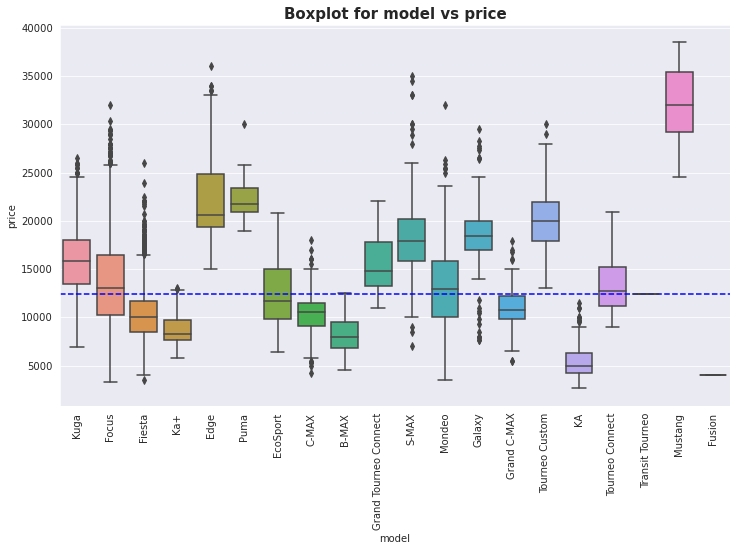

Avg price: 12404.185081323612


In [979]:
brand = 'ford'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [980]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Kuga: 12
Focus: 32
Fiesta: 114
Ka+: 3
Edge: 5
Puma: 1
C-MAX: 11
S-MAX: 12
Mondeo: 6
Galaxy: 20
Grand C-MAX: 7
Tourneo Custom: 2
KA: 9
total: 234


À remarquer:

Suggestions:

##### Mercedes

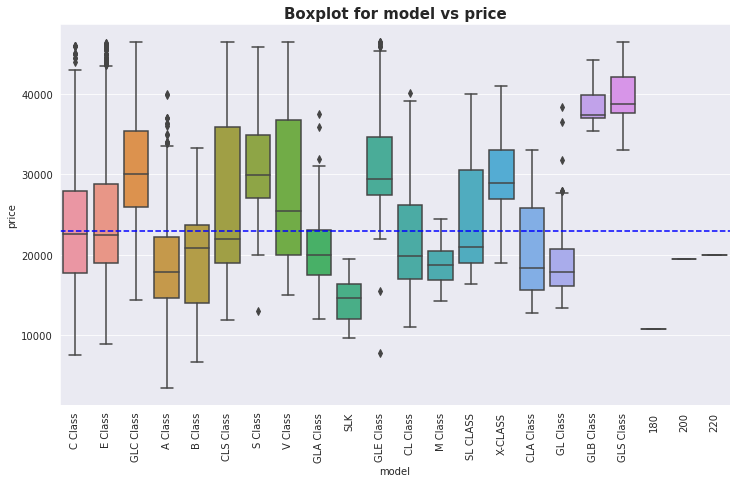

Avg price: 22907.92309808777


In [981]:
brand = 'mercedes'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [982]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
C Class: 12
E Class: 33
A Class: 16
S Class: 1
GLA Class: 3
GLE Class: 9
CL Class: 1
GL Class: 6
total: 81


À remarquer:

Suggestions:

##### Volkswagen

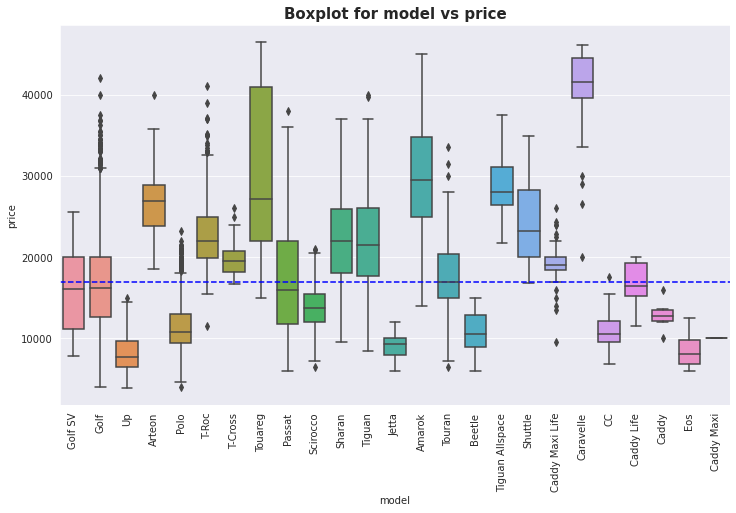

Avg price: 16896.307468927866


In [983]:
brand = 'vw'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [984]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Golf: 55
Up: 1
Arteon: 1
Polo: 67
T-Roc: 21
T-Cross: 2
Passat: 1
Scirocco: 3
Tiguan: 2
Touran: 4
Caddy Maxi Life: 11
Caravelle: 4
CC: 1
Caddy: 2
total: 175


À remarquer:

Suggestions:

##### Audi

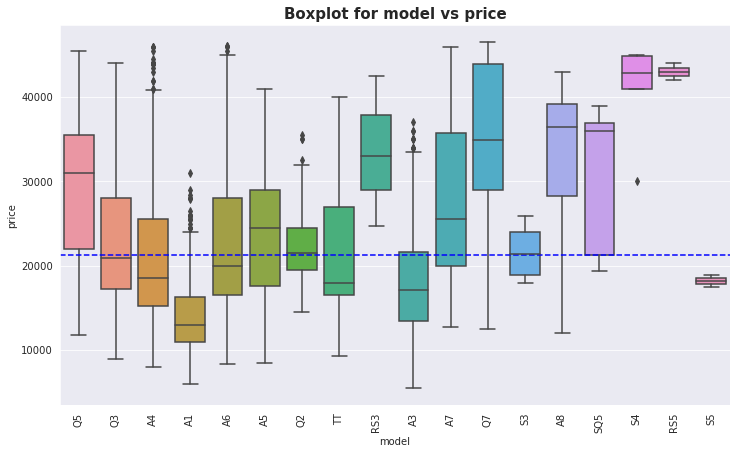

Avg price: 21313.91106856944


In [985]:
brand = 'audi'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [986]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
A4: 21
A1: 19
A6: 4
Q2: 4
A3: 10
S4: 1
total: 59


À remarquer:

Suggestions:

##### Toyota

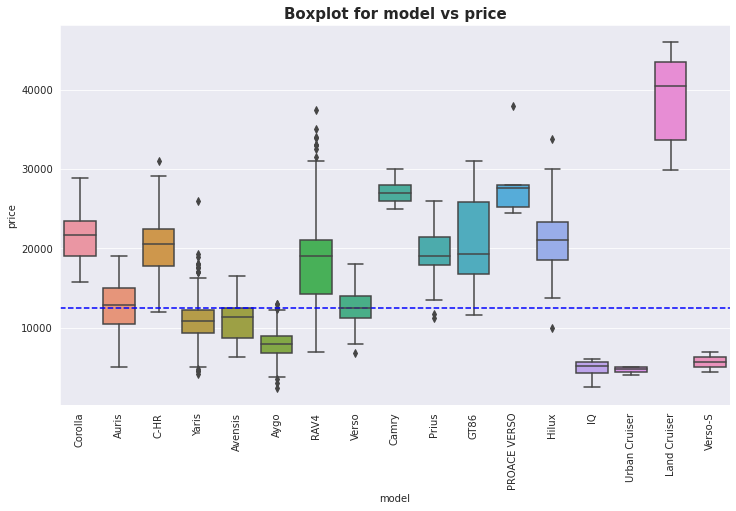

Avg price: 12427.5272


In [987]:
brand = 'toyota'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [988]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
C-HR: 1
Yaris: 15
Aygo: 10
RAV4: 9
Verso: 1
Prius: 2
PROACE VERSO: 1
Hilux: 2
total: 41


À remarquer:

Suggestions:

##### BMW

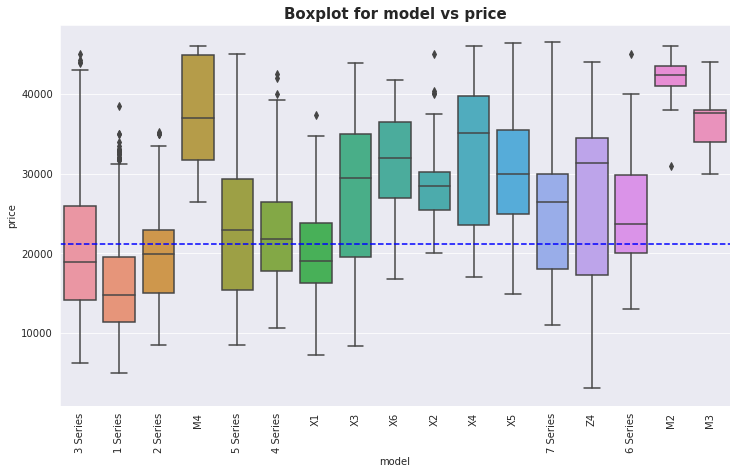

Avg price: 21244.82392542724


In [989]:
brand = 'bmw'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

À remarquer:

Suggestions:

##### Hyundai

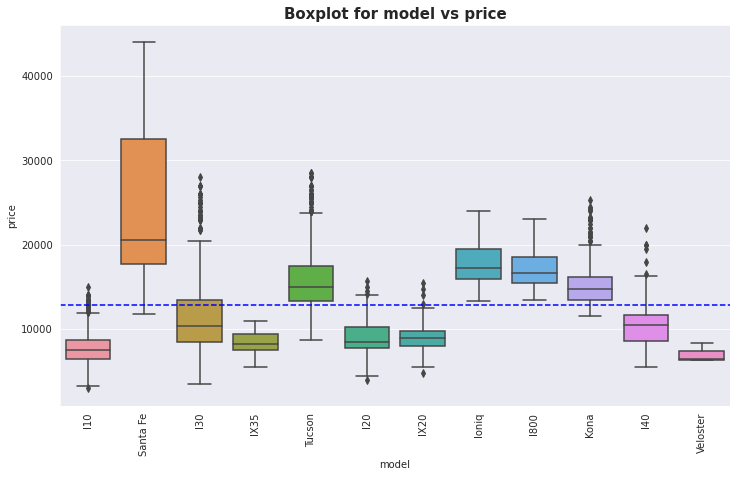

Avg price: 12815.090017513136


In [990]:
brand = 'hyundai'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

À remarquer:

Suggestions:

##### Opel

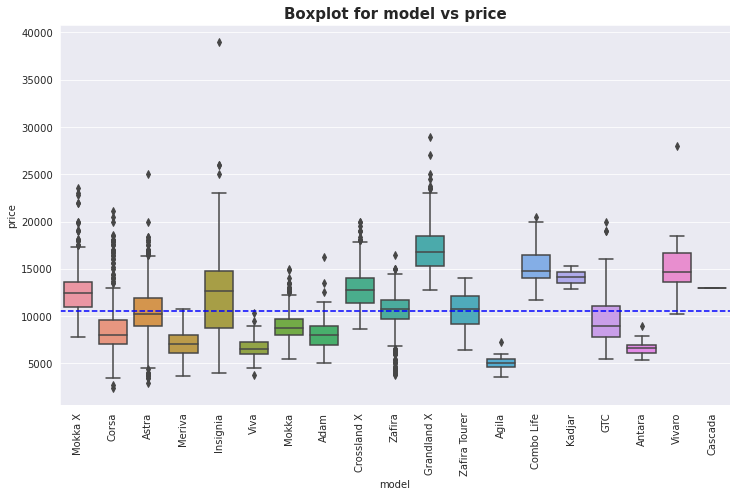

Avg price: 10484.38132347114


In [991]:
brand = 'opel'
brand_data = df[df['brand'] == brand]
beda.get_boxplot(data=brand_data, x=var, y=target_var, rotation=90)

In [992]:
outliers_count_by_model(brand_data)

Nombre de valeurs suspectes par modèle:
Mokka X: 20
Corsa: 37
Astra: 35
Insignia: 4
Viva: 3
Mokka: 20
Adam: 3
Crossland X: 12
Zafira: 35
Grandland X: 8
Agila: 1
Combo Life: 1
GTC: 3
Antara: 1
Vivaro: 1
total: 184


À remarquer:

* Prix extrêmes sur certains modèles: Mokka et Insignia

Suggestions:


#### Transmission vs Price

In [993]:
var = 'transmission'

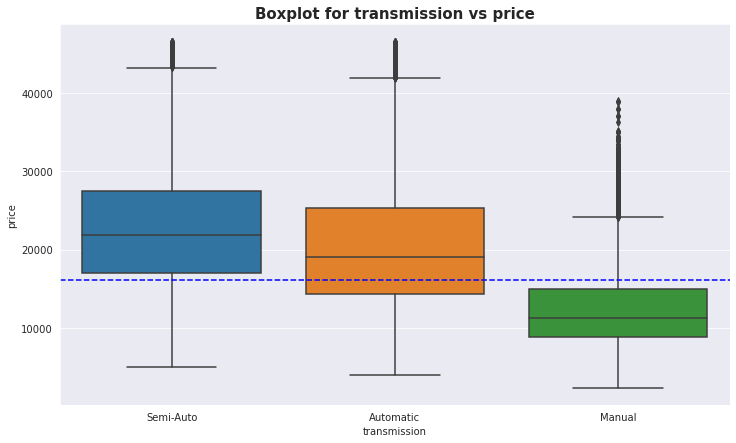

Avg price: 16179.621785228168


In [994]:
beda.get_boxplot(data=df, x=var, y=target_var)

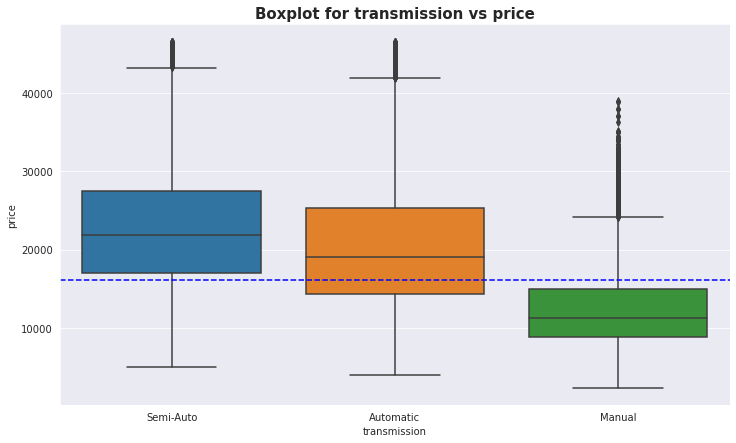

Avg price: 16179.621785228168


In [995]:
beda.get_boxplot(data=df, x=var, y=target_var)

#### Fuel Economy vs Price

In [996]:
var = 'fuel_economy'

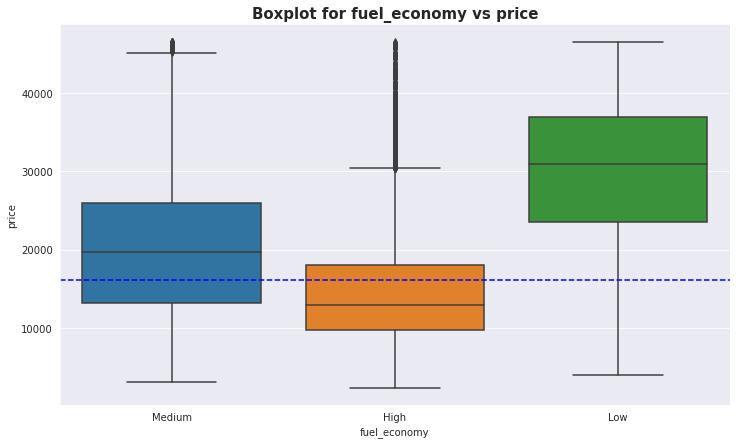

Avg price: 16179.621785228168


In [997]:
beda.get_boxplot(data=df, x=var, y=target_var)

#### Fuel Type vs Price

In [998]:
var = 'fuel_type'

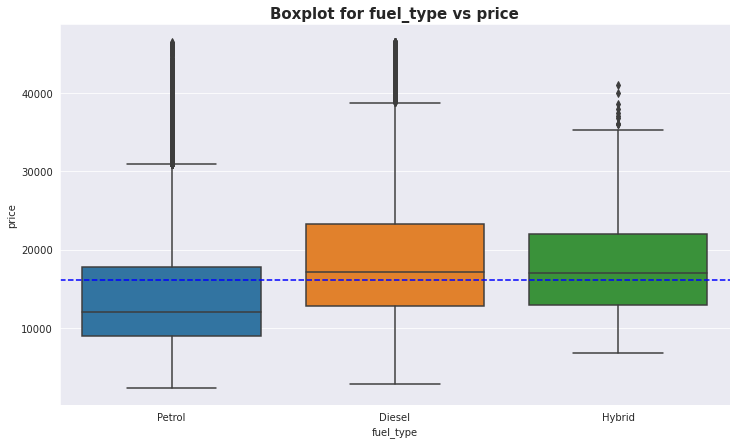

Avg price: 16179.621785228168


In [999]:
beda.get_boxplot(data=df, x=var, y=target_var)

#### Engine Class vs Price

In [1000]:
var = 'engine_class'

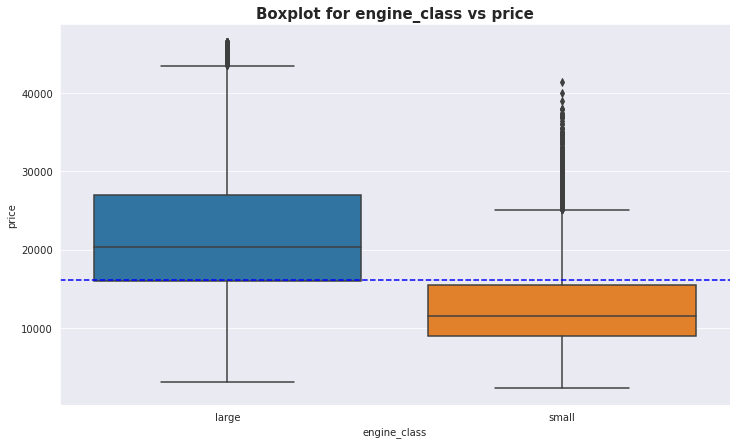

Avg price: 16179.621785228168


In [1001]:
beda.get_boxplot(data=df, x=var, y=target_var)

#### Tax Package vs Price

In [1002]:
var = 'tax_package'

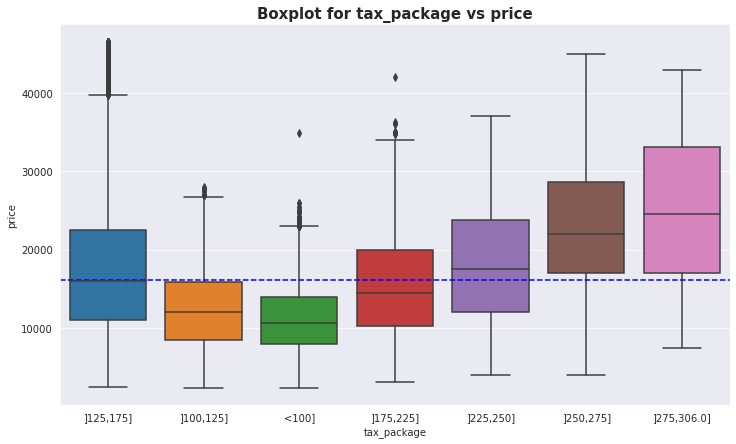

Avg price: 16179.621785228168


In [1003]:
beda.get_boxplot(data=df, x=var, y=target_var)

#### Year Category vs Price

In [1004]:
var = 'year_category'

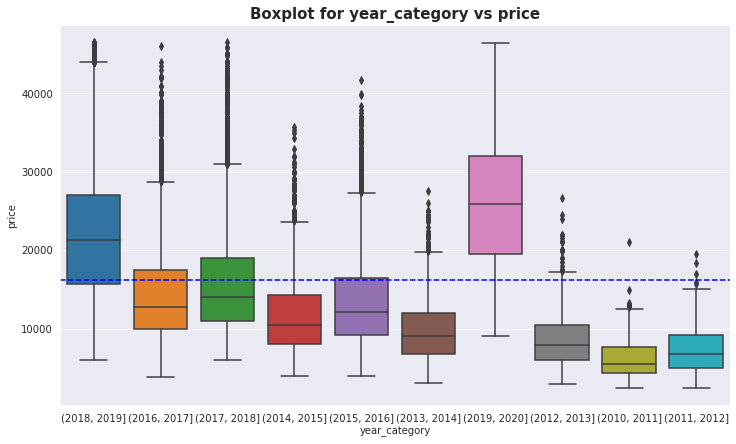

Avg price: 16179.621785228168


In [1005]:
beda.get_boxplot(data=df, x=var, y=target_var)

## Statistiques

### Corrélations des variables continues

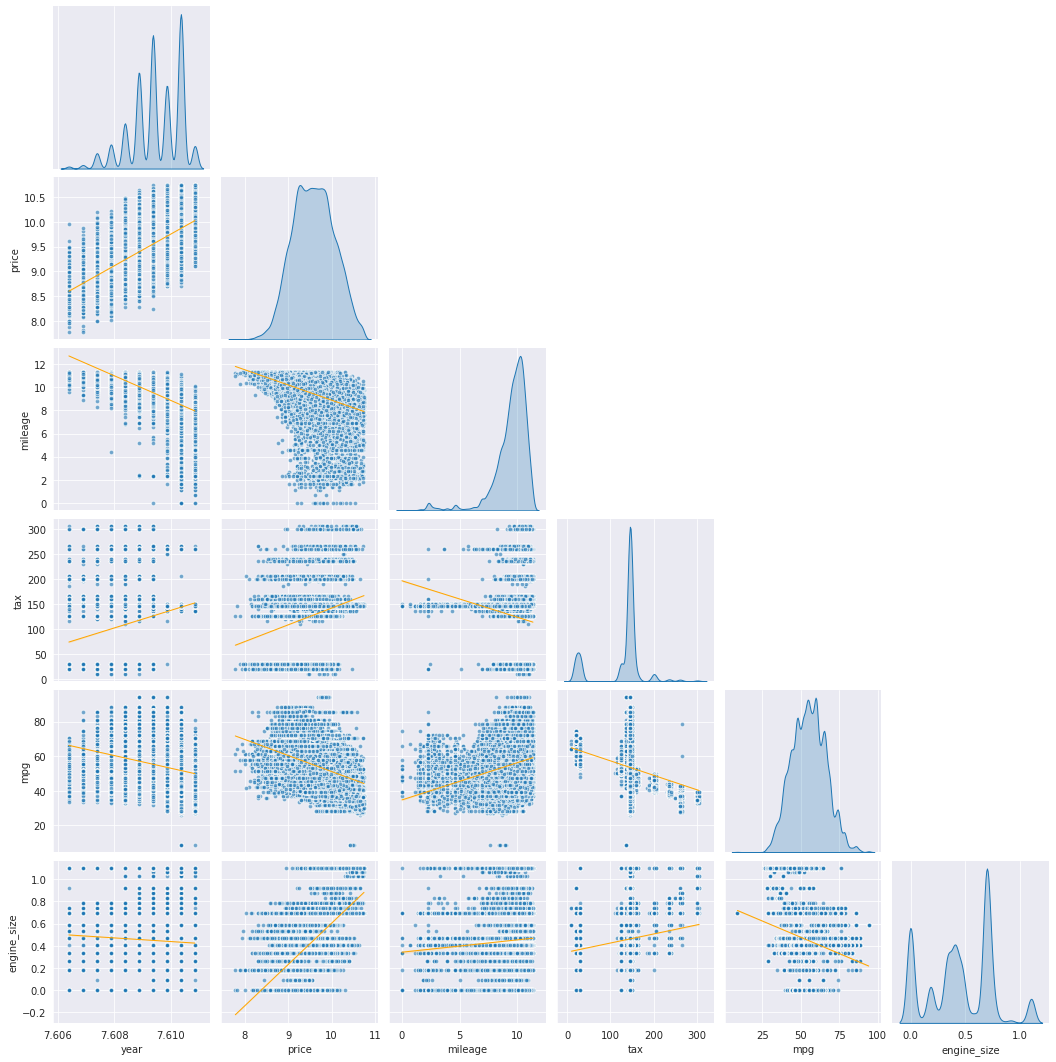

In [1007]:
beda.get_pairplot(df, log=['year', 'price', 'mileage', 'engine_size'])

Les corrélations les plus facilement observables sont:
* `price` et `year`
* `mileage` et `year`
* `mileage` et `price` (sans doute par transitivité)

On peut supposer une légère corrélation entre `tax` et `engine size` ou encore entre `tax` et `mpg`

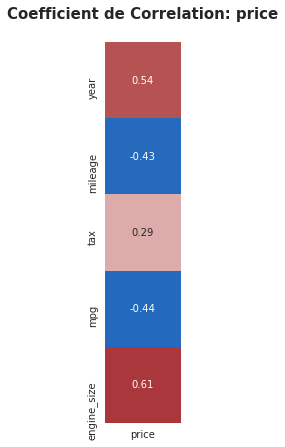

In [1008]:
beda.get_correlation(df, target='price')

#### Observations des corrélations avec la target `price`

Corrélation positive par ordre décroissant:

1. `price` et `engine_size` sont positivement corrélés. Les voitures avec une taille de moteur plus importante sont plus chères.
1. `price` et `year` sont positivement corrélés.
    Les voiture plus récentes sont plus chères
1. `price` et `tax` plutôt positivement corrélés. C'est peut-être un effet de bord de la corrélation entre `mpg` et `tax`

Corrélation négative par ordre croissant:

1. `price` et `mileage` sont négativement corrélés.
    Plus les distances parcourues par la voiture sont grandes moins chère sera le prix de revente
1. `price` et `mpg` sont négativement corrélés. On pourrait penser que les voitures avec un meilleur rendement se vendraient plus chères, cette corrélation négative pourrait se justifier par le fait que les moteurs plus gros sont plus cher, ont une consommation plus grande et un rendement plus bas.


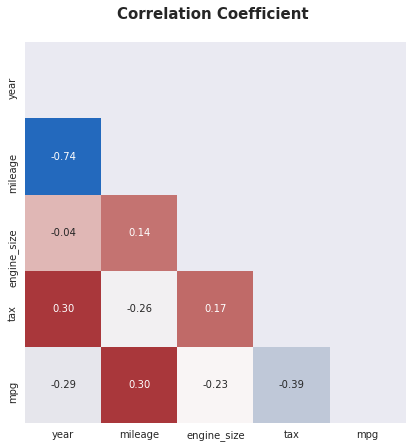

In [1009]:
beda.get_correlation(
    df, fields=['year', 'mileage', 'engine_size', 'tax', 'mpg'])

#### Observations des corrélations entre features

Il n'y a pas d'interdépendances positives franches entre les différentes features.

Les corrélations positives remarquables sont, par ordre décroissant:

1. `mpg` et `mileage` sont positivement corrélés.
1. `tax` et `engine_size` sont positivement corrélés.

Les corrélations négatives remarquables par ordre croissant:

1. `mileage` et `year` sont négativement corrélés. Ce qui fait sens, à moins de n'avoir jamais utilisé sa voiture, plus l'année est ancienne (petite), plus le nombre de miles parcouru est grand.
1. `mpg` et `tax` sont négativement corrélés. La corrélation peut être renforcée par des effets indirects. Si on postule qu'un moteur plus grand consomme plus par miles parcouru et que la taxe augmente avec la taille du moteur, on peut penser que plus le rendement est grand, moins la taxe est élevée. 
1. `mpg` et `engine_size` sont négativement corrélés.
1. `mpg` et `year` sont négativement corrélés.

#### Corrélation positive faible

##### `mileage` vs `engine_size`

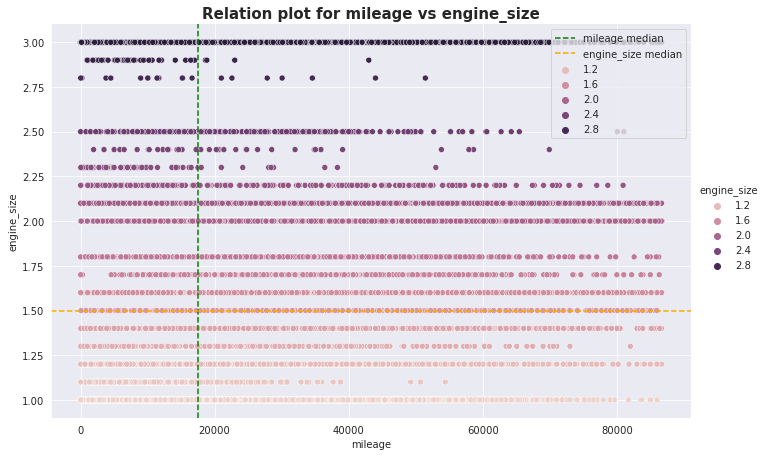

Avg mileage: 21898.817966903072
Avg engine_size: 1.6326760512930576


In [1010]:
beda.get_relplot(data=df, x='mileage', y='engine_size',
                 x_trace=['median'], y_trace=['median'])

##### `tax` vs `year`

In [1011]:
var_a = 'tax'
var_b = 'year'

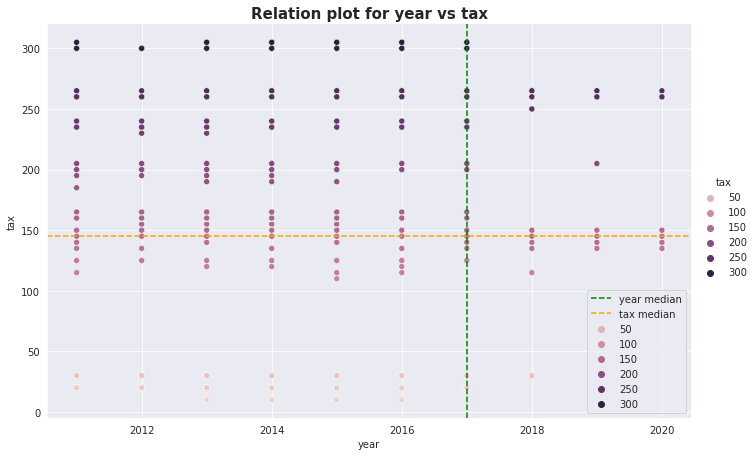

Avg year: 2017.1871910595314
Avg tax: 127.39657210401892


In [1012]:
beda.get_relplot(data=df, x=var_b, y=var_a, x_trace=[
                 'median'], y_trace=['median'])

#### Corrélation positive

##### `mileage` vs `mpg`

In [1013]:
var_a = 'mileage'
var_b = 'mpg'

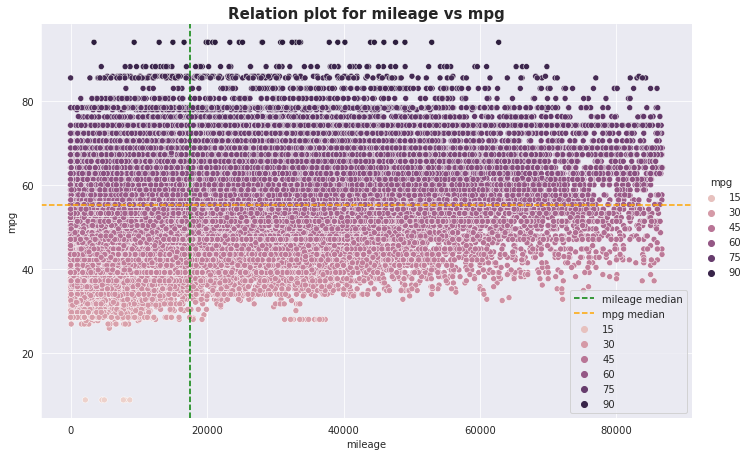

Avg mileage: 21898.817966903072
Avg mpg: 55.0119306540517


In [1014]:
beda.get_relplot(data=df, x=var_a, y=var_b, x_trace=[
                 'median'], y_trace=['median'])

##### `tax` vs `engine_size`

In [1015]:
var_a = 'tax'
var_b = 'engine_size'

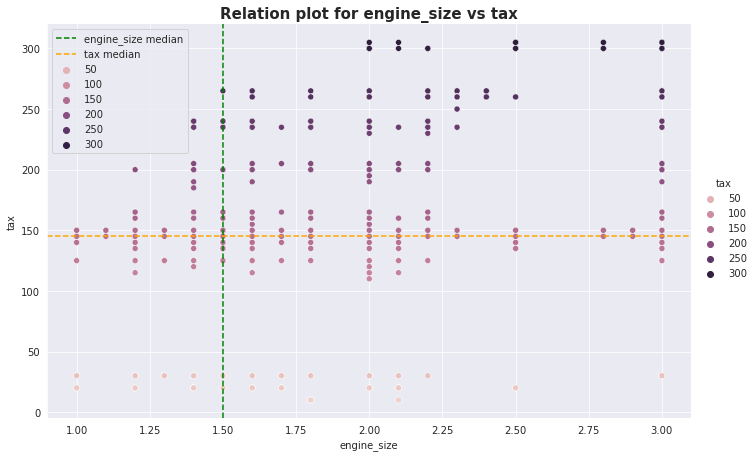

Avg engine_size: 1.6326760512930576
Avg tax: 127.39657210401892


In [1016]:
beda.get_relplot(data=df, x=var_b, y=var_a, x_trace=[
                 'median'], y_trace=['median'])

#### Corrélation négative

##### `mileage` vs `year`

In [1017]:
var_a = 'mileage'
var_b = 'year'

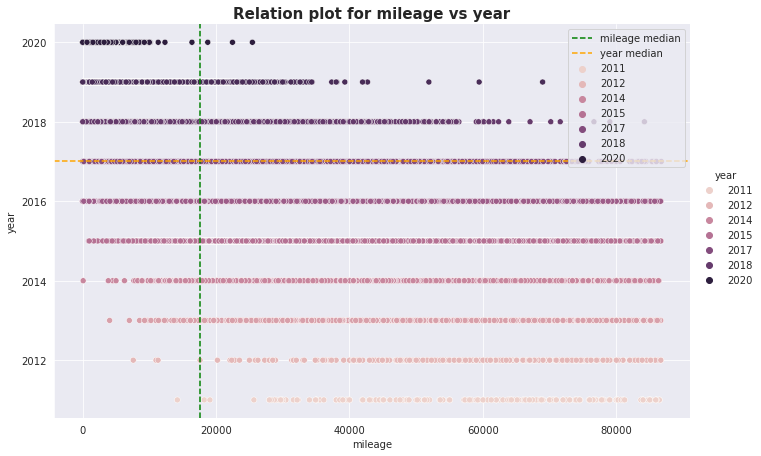

Avg mileage: 21898.817966903072
Avg year: 2017.1871910595314


In [1018]:
beda.get_relplot(data=df, x=var_a, y=var_b, x_trace=[
                 'median'], y_trace=['median'])

##### `tax` vs `mpg`

In [1019]:
var_a = 'tax'
var_b = 'mpg'

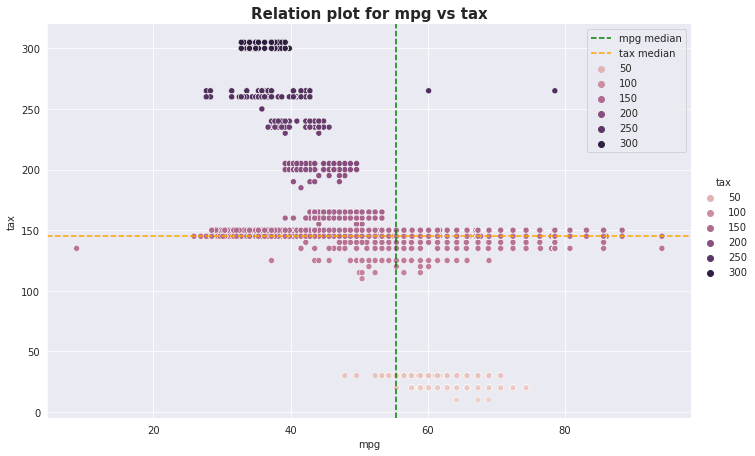

Avg mpg: 55.0119306540517
Avg tax: 127.39657210401892


In [1020]:
beda.get_relplot(data=df, x=var_b, y=var_a, x_trace=[
                 'median'], y_trace=['median'])

### Correlations des variables catégorielles

In [1031]:
categorical_columns = beda.get_categorical_columns(df)
print(categorical_columns)

['model', 'transmission', 'fuel_type', 'brand', 'year_category', 'fuel_economy', 'engine_class', 'tax_package']


##### Association entre variables catégorielles

In [1110]:
for i in range(len(categorical_columns)-1):
    x = categorical_columns[i]
    vs_candidates = categorical_columns[i+1:]
    for j in range(len(vs_candidates)):
        y = vs_candidates[j]
        chi2, pvalue, cramer_v = beda.unbiased_cramer_v(df[x], df[y], show=False)
        content = {"table":{"title":'Cramer V results',
                            "columns":["Chi-squared","Probability Value","Cramér's V"],
                            "results":[[chi2,pvalue,cramer_v]]
                            }}
        term.article(title=f'{x} vs {y}',content=content)
        

model vs transmission ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 28524.4206  │      0.0000       │   0.5025   │
└─────────────┴───────────────────┴────────────┘

model vs fuel_type ──────────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 51995.8373  │      0.0000       │   0.6803   │
└─────────────┴───────────────────┴────────────┘

model vs brand ──────────────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 446688.0000 │      0.0000       │   0.9986   │
└─────────────┴───────────────────┴────────────┘

model vs year_category ──────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 21433.8079  │      0.0000       │   0.1994   │
└─────────────┴───────────────────┴────────────┘

model vs fuel_economy ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 23608.2261  │      0.0000       │   0.4567   │
└─────────────┴───────────────────┴────────────┘

model vs engine_class ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 34346.4347  │      0.0000       │   0.7825   │
└─────────────┴───────────────────┴────────────┘

model vs tax_package ────────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 68576.9166  │      0.0000       │   0.4493   │
└─────────────┴───────────────────┴────────────┘

transmission vs fuel_type ───────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  9350.2748  │      0.0000       │   0.2893   │
└─────────────┴───────────────────┴────────────┘

transmission vs brand ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 17834.0266  │      0.0000       │   0.3995   │
└─────────────┴───────────────────┴────────────┘

transmission vs year_category ───────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  2569.5652  │      0.0000       │   0.1512   │
└─────────────┴───────────────────┴────────────┘

transmission vs fuel_economy ────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  2765.8684  │      0.0000       │   0.1573   │
└─────────────┴───────────────────┴────────────┘

transmission vs engine_class ────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 12744.9122  │      0.0000       │   0.4777   │
└─────────────┴───────────────────┴────────────┘

transmission vs tax_package ─────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  2074.0032  │      0.0000       │   0.1359   │
└─────────────┴───────────────────┴────────────┘

fuel_type vs brand ──────────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 20507.8731  │      0.0000       │   0.4284   │
└─────────────┴───────────────────┴────────────┘

fuel_type vs year_category ──────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  1416.3613  │      0.0000       │   0.1119   │
└─────────────┴───────────────────┴────────────┘

fuel_type vs fuel_economy ───────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  3304.3447  │      0.0000       │   0.1719   │
└─────────────┴───────────────────┴────────────┘

fuel_type vs engine_class ───────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 18646.6548  │      0.0000       │   0.5779   │
└─────────────┴───────────────────┴────────────┘

fuel_type vs tax_package ────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  1103.6108  │      0.0000       │   0.0989   │
└─────────────┴───────────────────┴────────────┘

brand vs year_category ──────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  3308.1857  │      0.0000       │   0.0851   │
└─────────────┴───────────────────┴────────────┘

brand vs fuel_economy ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  3225.1848  │      0.0000       │   0.1695   │
└─────────────┴───────────────────┴────────────┘

brand vs engine_class ───────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 17187.8239  │      0.0000       │   0.5547   │
└─────────────┴───────────────────┴────────────┘

brand vs tax_package ────────────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  2516.7413  │      0.0000       │   0.0858   │
└─────────────┴───────────────────┴────────────┘

year_category vs fuel_economy ───────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  6842.8789  │      0.0000       │   0.2472   │
└─────────────┴───────────────────┴────────────┘

year_category vs engine_class ───────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  909.5486   │      0.0000       │   0.1270   │
└─────────────┴───────────────────┴────────────┘

year_category vs tax_package ────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 24307.8418  │      0.0000       │   0.2691   │
└─────────────┴───────────────────┴────────────┘

fuel_economy vs engine_class ────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  1923.3991  │      0.0000       │   0.1855   │
└─────────────┴───────────────────┴────────────┘

fuel_economy vs tax_package ─────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 12241.8811  │      0.0000       │   0.3309   │
└─────────────┴───────────────────┴────────────┘

engine_class vs tax_package ─────────────────────────────────────────────────────────────────

Cramer V results                                
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Chi-squared ┃ Probability Value ┃ Cramér's V ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│  1696.5114  │      0.0000       │   0.1740   │
└─────────────┴───────────────────┴────────────┘

### Welch ANOVA

In [1112]:
for col in categorical_columns:
    sample_container = pd.DataFrame()
    uniques_values = df[col].unique()
    sample_size = df[col].value_counts().min()//15
    content = []
    if sample_size < 10:
        sample_size = "not enough samples\n"
        content.append(term.create_section(title="Sample size:",content=sample_size))
    else:
        content.append(term.create_section(title="Sample size:",content=sample_size))
        for value in uniques_values:
            sample_container = pd.concat(
                [sample_container, df[df[col] == value].sample(sample_size, random_state=1)])
        normality = pg.normality(
            data=sample_container, dv=target_var, group=col)
        #print(f"\nNormality:\n{normality}")
        content.append(term.create_section(title="Normality:",content=normality))
        homogeneity = pg.homoscedasticity(
            data=sample_container, dv=target_var, group=col)
        content.append(term.create_section(title="Homogeneity:",content=homogeneity))
        #print(f"\nHomogeneity:\n{homogeneity}")
        aov = pg.welch_anova(data=sample_container, dv=target_var, between=col)
        content.append(term.create_section(title="Welch ANOVA:",content=aov))
        #print(f"\nWelch ANOVA:\n{aov}\n")
    term.article(title=col,content=content)

model ───────────────────────────────────────────────────────────────────────────────────────

Sample sizenot enough samples

transmission ────────────────────────────────────────────────────────────────────────────────

Sample size724

Normality:                  W          pval  normal
Semi-Auto  0.978182  6.426909e-09   False
Automatic  0.945151  1.008441e-15   False
Manual     0.947400  2.288820e-15   False

Homogeneity:                W          pval  equal_var
levene  94.980287  2.870146e-40      False

Welch ANOVA:         Source  ddof1        ddof2           F          p-unc       np2
0  transmission      2  1334.794722  597.981962  3.739565e-186  0.278565

fuel_type ───────────────────────────────────────────────────────────────────────────────────

Sample size97

Normality:               W          pval  normal
Petrol  0.813304  9.772240e-10   False
Diesel  0.951917  1.362237e-03   False
Hybrid  0.958340  3.684554e-03   False

Homogeneity:               W      pval  equal_var
levene  0.313603  0.731058       True

Welch ANOVA:      Source  ddof1       ddof2         F   p-unc      np2
0  fuel_type      2  191.564918  9.665306  0.0001  0.06548

brand ───────────────────────────────────────────────────────────────────────────────────────

Sample size190

Normality:                 W          pval  normal
skoda     0.911446  2.927724e-09   False
ford      0.905570  1.198857e-09   False
vw        0.946689  1.610119e-06   False
audi      0.945961  1.383458e-06   False
toyota    0.919578  1.073099e-08   False
bmw       0.967495  2.150428e-04   False
hyundai   0.913021  3.742783e-09   False
mercedes  0.965460  1.259897e-04   False
opel      0.955857  1.204186e-05   False

Homogeneity:                W          pval  equal_var
levene  22.101857  2.646475e-32      False

Welch ANOVA:  Source  ddof1       ddof2         F          p-unc       np2
0  brand      8  704.016615  88.31927  5.388875e-101  0.284528

year_category ───────────────────────────────────────────────────────────────────────────────

Sample size13

Normality:                     W      pval  normal
(2018, 2019]  0.987374  0.998385    True
(2016, 2017]  0.885005  0.083387    True
(2017, 2018]  0.796087  0.006127   False
(2014, 2015]  0.928450  0.325227    True
(2015, 2016]  0.803640  0.007532   False
(2013, 2014]  0.952619  0.638445    True
(2019, 2020]  0.905200  0.157608    True
(2012, 2013]  0.794383  0.005850   False
(2010, 2011]  0.824363  0.013472   False
(2011, 2012]  0.874453  0.060017    True

Homogeneity:               W          pval  equal_var
levene  6.243919  3.329012e-07      False

Welch ANOVA:          Source  ddof1      ddof2          F         p-unc       np2
0  year_category      9  48.413702  17.157027  2.859328e-12  0.655511

fuel_economy ────────────────────────────────────────────────────────────────────────────────

Sample size126

Normality:               W      pval  normal
Medium  0.973357  0.013636   False
High    0.919470  0.000001   False
Low     0.956384  0.000459   False

Homogeneity:                W      pval  equal_var
levene  11.330114  0.000017      False

Welch ANOVA:         Source  ddof1       ddof2           F         p-unc       np2
0  fuel_economy      2  240.519801  128.396375  1.149680e-38  0.386947

engine_class ────────────────────────────────────────────────────────────────────────────────

Sample size1419

Normality:              W          pval  normal
large  0.964564  3.902244e-18   False
small  0.941370  2.899377e-23   False

Homogeneity:                 W          pval  equal_var
levene  244.118152  7.467276e-53      False

Welch ANOVA:         Source  ddof1        ddof2            F          p-unc       np2
0  engine_class      1  2331.360459  1297.363294  2.897865e-226  0.313876

tax_package ─────────────────────────────────────────────────────────────────────────────────

Sample size12

Normality:                    W      pval  normal
]125,175]    0.935259  0.439191    True
]100,125]    0.977003  0.968819    True
<100]        0.821814  0.016765   False
]175,225]    0.923508  0.316330    True
]225,250]    0.955780  0.722331    True
]250,275]    0.920695  0.291723    True
]275,306.0]  0.799024  0.009133   False

Homogeneity:              W     pval  equal_var
levene  1.18554  0.32293       True

Welch ANOVA:        Source  ddof1     ddof2         F     p-unc       np2
0  tax_package      6  34.04112  8.338088  0.000014  0.392273